In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [2]:
data      = np.load("data/5j0n/angle_recovery_polynomial.npz")
q_predicted, losses, q_all = data["arr_0"], data["arr_1"], data["arr_2"]

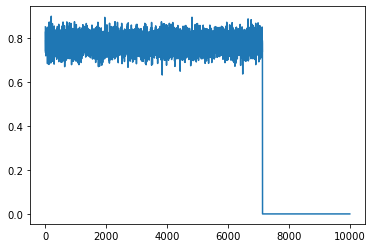

In [3]:
plt.plot(losses)

# Noisy

## 1. Variance=10

In [ ]:
NOISY_VAR = 10

### Model Loss

In [0]:
training_loss = history1.history['loss']
val_loss = history1.history['val_loss']
mses = history1.history['mse']
val_mses = history1.history['val_mse']

np.savez(f"data/5j0n/5j0n_DE_noisy_history_uniform_var{NOISY_VAR}", training_loss, val_loss, mses, val_mses)

In [0]:
data = np.load(f"data/5j0n/5j0n_DE_noisy_history_uniform_var{NOISY_VAR}.npz")
training_loss, val_loss, mses, val_mses = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]

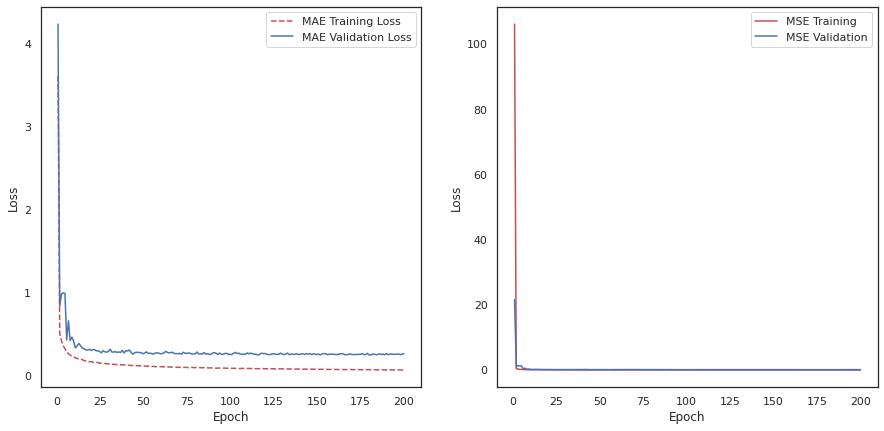

In [0]:
# Get training and test loss histories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--', label='MAE Training Loss')
ax1.plot(epoch_count, val_loss, 'b-', label='MAE Validation Loss')
ax1.legend()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

ax2.plot(epoch_count, mses, 'r-', label='MSE Training')
ax2.plot(epoch_count, val_mses, 'b-', label='MSE Validation')
ax2.legend()
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
plt.show();

### dP/dQ

## dP/dQ plot

In [ ]:
# put correct filename
model_filename = f"training/var{NOISY_VAR}.h5" 
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model(model_filename)

In [0]:
from cryoem.conversions import d_q, euler2quaternion
from cryoem.plots import plot_dP_dQ

In [0]:
def d_p(p1, p2):
    p1 = tf.cast(p1, dtype=tf.float32)
    p2 = tf.cast(p2, dtype=tf.float32)
    return model.predict([p1, p2], batch_size=256)

In [0]:
# 5:41 with 1024
# 5:43     with 256
idx1 = list(np.random.choice(test_idx, size=1000))
idx2 = list(np.random.choice(test_idx, size=1000))

q1_true = euler2quaternion([angles_true[i] for i in idx1])
q2_true = euler2quaternion([angles_true[i] for i in idx2])

p1 = [X[i] for i in idx1]
p2 = [X[i] for i in idx2]

dP_values = d_p(p1, p2).T[0]
dQ_values = d_q(q1_true, q2_true).numpy()

In [0]:
plot_dP_dQ(dP_values, dQ_values)

In [0]:
MAE(dQ_values, dP_values)